# Analysis of CMIP6, ERA5, and CloudSat

In [12]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
import xarray as xr
from glob import glob
import cartopy.crs as ccrs
import cartopy as cy
import numpy as np

import matplotlib.pyplot as plt
from cmcrameri import cm


In [13]:
# reload imports
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
variable_id = [
               ['prsn', 'sf'],
               # ['clivi', 'ciwc']
               ]

In [15]:
cmip_file = '/scratch/franzihe/output/CMIP6_hist/1deg/{}_season_1deg_1985_2014.nc'.format(variable_id[0][0])

In [16]:
era_file = '/scratch/franzihe/output/ERA5/monthly_means/1deg/{}_season_1deg_1985_2014.nc'.format(variable_id[0][1])

In [18]:
# Read in datasets 
cmip = xr.open_dataset(cmip_file)
era = xr.open_dataset(era_file)

In [19]:
if variable_id[0][0] ==  'prsn':
    # m of water equivalent can be converted to kgm^2/day or mm/day by multiplying by 1000.
    sf = era.sf*1000

    # kg m-2 s-1 to mm/day *86400
    prsn = cmip.prsn*86400

if variable_id[0][0] == 'clivi':
    sf = era.ciwc.isel(member_id = 0)
    prsn = cmip.clivi


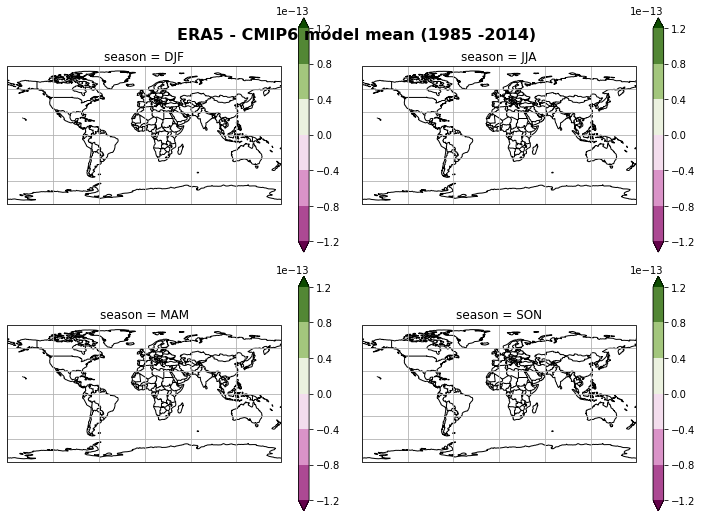

In [22]:
fig, axsm = plt.subplots(2,2, 
                         figsize=[10,7], 
                         subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle('ERA5 - CMIP6 model mean (1985 -2014)', fontsize=16, fontweight="bold")

axs = axsm.flatten()
for ax, i in zip(axs, prsn.season):
    im = (sf-prsn).sel(season = i).plot.contourf(ax=ax, 
                                     transform=ccrs.PlateCarree(), 
                                     cmap=cm.bam,
                                     robust=True,
                                    #  vmin = -.8, vmax=.8,
                                    #  levels = np.arange(-.8,.8,.1),
                                    # vmin = -.06, vmax =.06,
                                    # levels = np.arange(-.06,.06,.01),
                                    #  add_colorbar = False,
                                     extend = 'both')

    ax.coastlines()
    gl = ax.gridlines()
    ax.add_feature(cy.feature.BORDERS);
    gl.top_labels = False

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([1., 0.1, 0.05, 0.7])
# cb = fig.colorbar(im, cax=cbar_ax, orientation="vertical", )
# cb.set_label(label='Snowfall (mm$\,$day$^{-1}$)', weight='bold')
# cb.set_label(label='Ice Water Path (kg$\,$m$^{-2}$)', weight='bold')


plt.tight_layout()
fig.subplots_adjust(top=1)